In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
file_path = "Fish.csv"
df = pd.read_csv(file_path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
scaler = StandardScaler()
df[['Length1','Length2','Length3','Height','Width']] = scaler.fit_transform(df[['Length1','Length2','Length3','Height','Width']])
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,0,290.0,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,0,340.0,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0,363.0,0.005302,0.054694,0.196390,0.879771,0.022621
4,0,430.0,0.025372,0.054694,0.239592,0.812835,0.426371


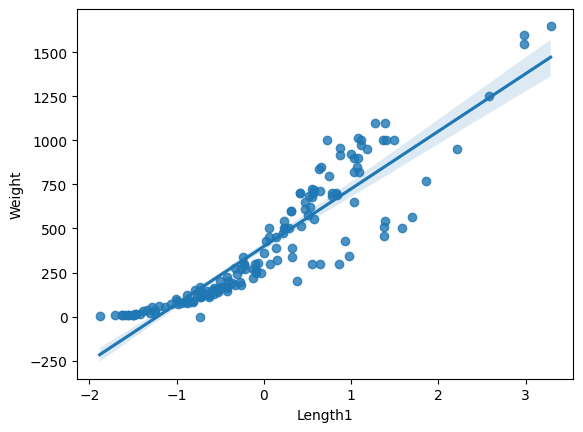

In [8]:
sns.regplot(x='Length1',y='Weight',data=df)
plt.show()

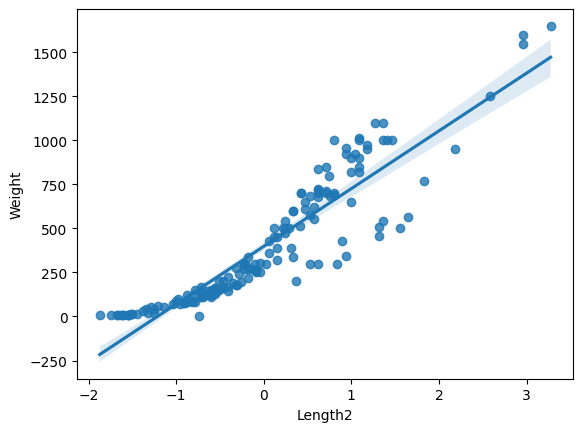

In [9]:
sns.regplot(x='Length2',y='Weight',data=df)
plt.show()

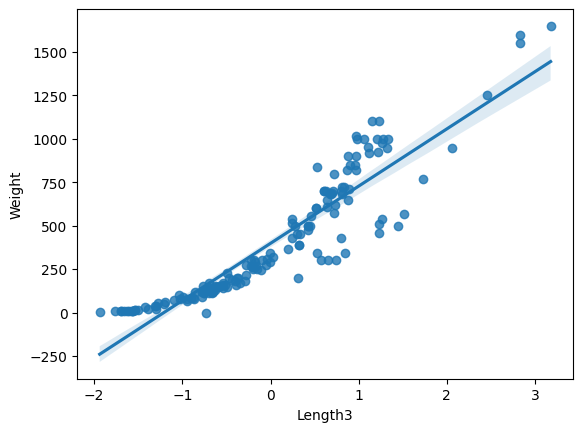

In [10]:
sns.regplot(x='Length3',y='Weight',data=df)
plt.show()

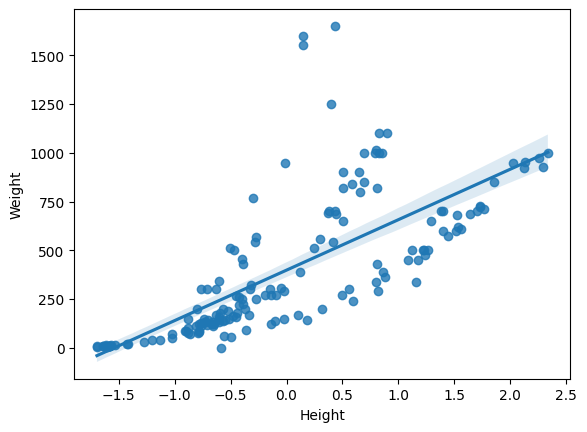

In [11]:
sns.regplot(x='Height',y='Weight',data=df)
plt.show()

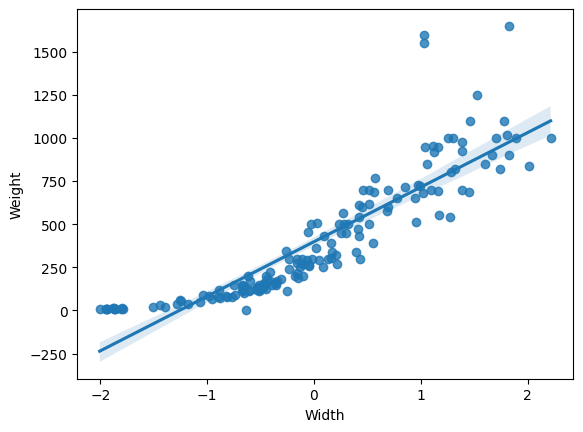

In [12]:
sns.regplot(x='Width',y='Weight',data=df)
plt.show()

In [19]:
X=df.drop(['Weight'],axis=1)
y=df['Weight']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


In [20]:
reg = LinearRegression()

In [21]:
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = reg.predict(X_test)

In [23]:
mean_absolute_error(y_test,y_pred)

105.84471607633084

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(183.14167284790034)

In [25]:
r2_score(y_test,y_pred)

0.8234428890661584

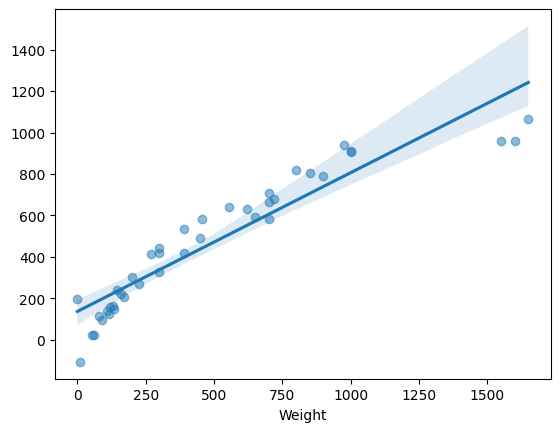

In [28]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'alpha':0.5})
plt.show()